In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as knn
%matplotlib inline

In [3]:
df=pd.read_csv('heart_disease.csv')

In [4]:
X=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y=df[['output']].values

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Solution

In [71]:
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = knn()
clf3 = LogisticRegression(random_state=42)
clf4 = SVC(probability=True, random_state=42)

In [72]:
params={'SVC':{'kernel':['sigmoid', 'linear', 'poly', 'rbf']},
        'Decision Tree':{'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
        'KNN':{'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
        'Logistic Regression': {'C':[0.1, 1, 10, 100, 1000]}
       }
models = {'Decision Tree': clf1, 'KNN': clf2, 'Logistic Regression': clf3, 'SVC': clf4}

In [82]:
scoring=['r2','f1','accuracy']

In [83]:
models_scores = {}
for model_name,model in models.items():
    grid_search = GridSearchCV(model, param_grid=params[model_name], scoring='accuracy', cv=cv, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    scores=cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
    
    models_scores[model_name]={i:scores[f'test_{i}'].mean() for i in scoring}

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was 

In [84]:
models_scores

{'Decision Tree': {'r2': 0.04177516714601119,
  'f1': 0.7658730158730158,
  'accuracy': 0.7658536585365854},
 'KNN': {'r2': -0.5390015114183911,
  'f1': 0.6415670381627828,
  'accuracy': 0.624390243902439},
 'Logistic Regression': {'r2': 0.6007323977528582,
  'f1': 0.9073381021335724,
  'accuracy': 0.9024390243902438},
 'SVC': {'r2': -0.581564926974134,
  'f1': 0.6847800469141055,
  'accuracy': 0.6146341463414634}}

# classification report &  confusion matrix

In [85]:
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix

In [89]:
model = SVC(kernel = 'rbf')
model.fit( X_train, y_train )
y_pred=model.predict(X_test)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        42
           1       0.71      0.88      0.78        58

    accuracy                           0.72       100
   macro avg       0.73      0.69      0.69       100
weighted avg       0.73      0.72      0.71       100



C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


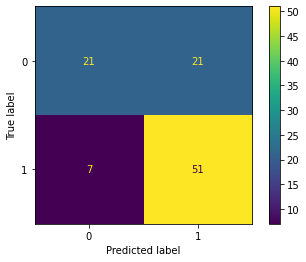

In [92]:
plot_confusion_matrix(model, X_test, y_test)